In [5]:
from config import print_config, modify_config
print_config('C0286T')

{'if_build_IO': False, 'dateTest': ['2018.03.09', '2018.03.12', '2018.03.13', '2018.03.14', '2018.03.15', '2018.03.16', '2018.03.19', '2018.03.20', '2018.03.21', '2018.03.22', '2018.03.23', '2018.03.26', '2018.03.27', '2018.03.28', '2018.03.29', '2018.03.30', '2018.04.02', '2018.04.03', '2018.04.04', '2018.04.05', '2018.04.06', '2018.04.09', '2018.04.10', '2018.04.11', '2018.04.12', '2018.04.13', '2018.04.16', '2018.04.17', '2018.04.18', '2018.04.19', '2018.04.20', '2018.04.23', '2018.04.24', '2018.04.25', '2018.04.26', '2018.04.27', '2018.04.30', '2018.05.01', '2018.05.02', '2018.05.03', '2018.05.04', '2018.05.07', '2018.05.08', '2018.05.09', '2018.05.10', '2018.05.11', '2018.05.14', '2018.05.15', '2018.05.16', '2018.05.17', '2018.05.18', '2018.05.21', '2018.05.22', '2018.05.23', '2018.05.24', '2018.05.25', '2018.05.28', '2018.05.29', '2018.05.30', '2018.05.31', '2018.06.01', '2018.06.04', '2018.06.05', '2018.06.06', '2018.06.07', '2018.06.08', '2018.06.11', '2018.06.12', '2018.06.13'

True

In [6]:
modify_config('C0286T','if_build_IO',True)


Config file ../config/C0286T.config saved


True

In [7]:
import random

def lottery():
    # returns 6 numbers between 1 and 40
    for i in range(6):
        yield random.randint(1, 40)

    # returns a 7th number between 1 and 15
    yield random.randint(1,15)


genFun=lottery()
for random_number in genFun:
       print("And the next number is... %d!" %(random_number))


def fib():
    a=1
    b=1
    while 1:
        yield a
        a,b=b,a+b

counter = 0
for n in fib():
    print(n)
    counter += 1
    if counter == 10:
        break

And the next number is... 23!
And the next number is... 10!
And the next number is... 13!
And the next number is... 27!
And the next number is... 5!
And the next number is... 3!
And the next number is... 11!
1
1
2
3
5
8
13
21
34
55


In [16]:
results_file_name = '_'.join([list_IDresults[i]+'E'+str(list_epoch_gre[i])+'T'+
                         str(list_t_index[i])+'W'+list_w_str[i]
                         for i in range(numberNetwors)])
print(results_file_name)

100287Nov09E6T4W55


181120151736_100287Nov09E6T2W55_100286Nov09E6T2W55_100285Nov09E16T3W55.p
AttributeError. Skip
181120164702_100287Nov09E6T2W55_100286Nov09E6T2W55_100285Nov09E16T3W55.p
12.660365672901081


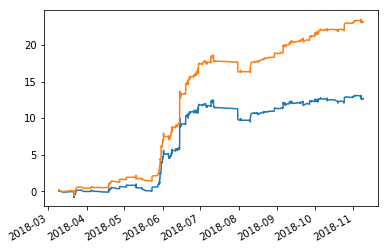

In [25]:
import numpy as np
import re
import os
import pickle
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

numberNetwors = 3
list_IDresults = ['100287Nov09','100286Nov09','100285Nov09']#
list_IDgre = ['100287Nov09']
list_name = ['87_06']
list_epoch_gre = [6,6,16]
list_epoch_journal = [6]
list_use_GRE = [True]
list_weights = [np.array([0,1])]
list_w_str = ["55","55","55"]
list_t_index = [2,2,3]
list_lb_mc_op = [.6]
list_lb_md_op = [.8]
list_lb_mc_ext = [.5]
list_lb_md_ext = [.6]
list_ub_mc_op = [1]
list_ub_md_op = [1]
list_ub_mc_ext = [1]
list_ub_md_ext = [1]
list_thr_sl = [1000]
list_thr_tp = [1000]
list_fix_spread = [False]
list_fixed_spread_pips = [4]
list_max_lots_per_pos = [.1]
list_flexible_lot_ratio = [False]
list_if_dir_change_close = [False]
list_if_dir_change_extend = [False]

directory = "../RNN/resultsLive/simulate/trader/"
results_file_name = '_'.join([list_IDresults[i]+'E'+str(list_epoch_gre[i])+'T'+
                         str(list_t_index[i])+'W'+list_w_str[i]
                         for i in range(numberNetwors)])

files_list = []
# get files list, and beginning and end current dates
files_list_all = sorted(os.listdir(directory))    
first_file = 1
fig_idx = 0
for filename in files_list_all:            
    m = re.search(results_file_name+'.p$',filename)
    if m!=None:
        print(filename)
        try:
            results=pickle.load( open( directory+filename, 'rb' ))
            list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in results['dts']]
            dates = matplotlib.dates.date2num(list_dates)
            plt.figure(fig_idx)
            fig_idx += 1
            plt.plot_date(list_dates, np.cumsum(results['ROIs']),fmt='-')
            plt.plot_date(list_dates, np.cumsum(results['GROIs']),fmt='-')
            plt.gcf().autofmt_xdate()
            print(np.cumsum(results['ROIs'])[-1])
        except AttributeError:
            print("AttributeError. Skip")

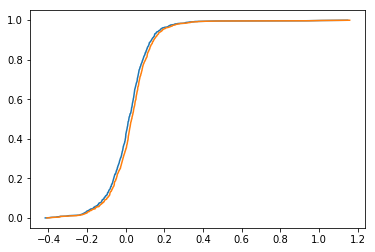

In [36]:
plt.plot(np.sort(results['ROIs']),np.array(range(results['ROIs'].shape[0]))/results['ROIs'].shape[0])
plt.plot(np.sort(results['GROIs']),np.array(range(results['ROIs'].shape[0]))/results['ROIs'].shape[0])

[datetime.datetime(2018, 9, 1, 0, 0), datetime.datetime(2018, 9, 1, 0, 1), datetime.datetime(2018, 9, 1, 0, 2)]


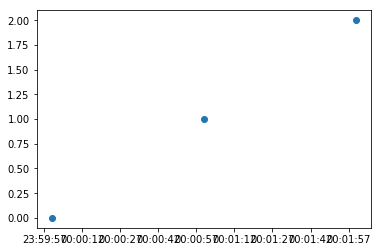

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
#dt.datetime.strftime(,'%y%m%d%H%M%S')
list_strdates = ['2018.09.01 00:00:00','2018.09.01 00:01:00','2018.09.01 00:02:00']
list_dates = [dt.datetime.strptime(date, '%Y.%m.%d %H:%M:%S') for date in list_strdates]
#dts = dt.datetime.strptime(list_dates,'%Y.%m.%d %H:%M:%S')
print(list_dates)
dates = matplotlib.dates.date2num(list_dates)
plt.plot_date(dates, [0,1,2])

In [5]:
?matplotlib.dates.date2num

(1600,)
(1800,)
(1100,)
(1700,)
(1500,)
(5100,)
(3200,)
(2500,)
(3100,)
(4800,)
(1100,)
(9200,)
(15200,)
(19500,)


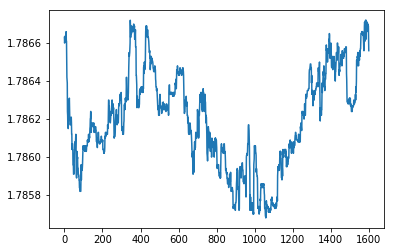

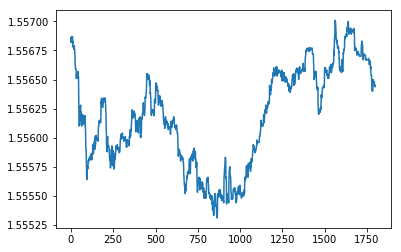

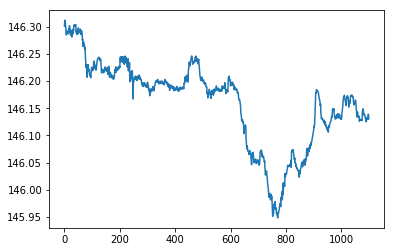

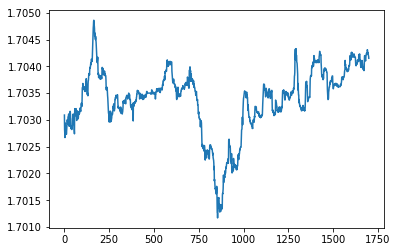

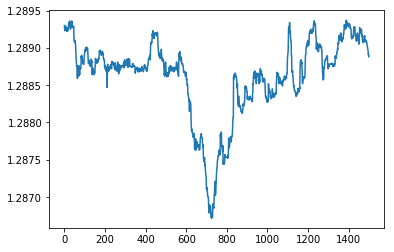

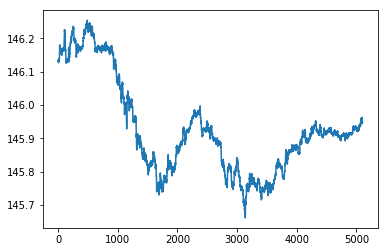

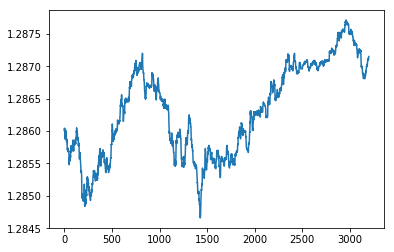

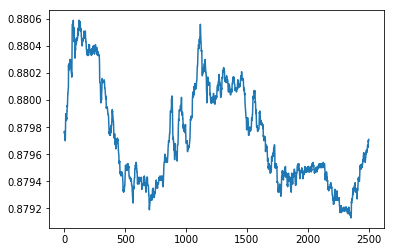

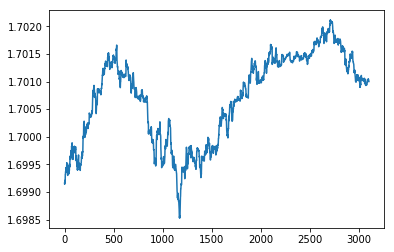

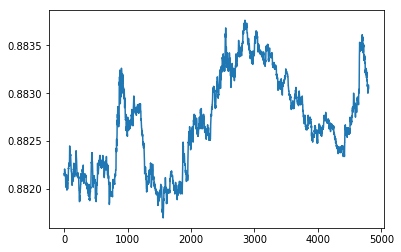

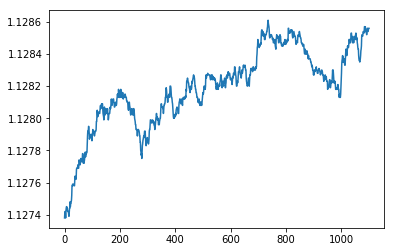

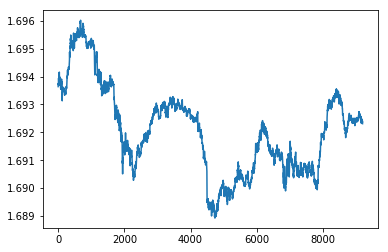

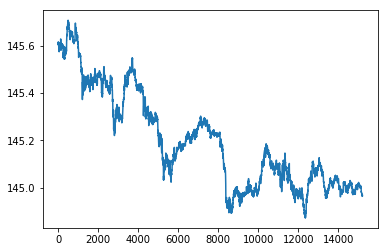

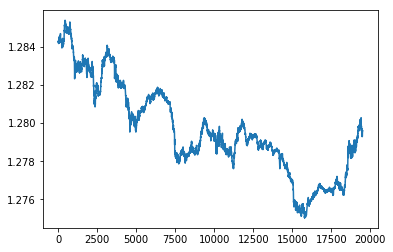

In [63]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115023323C181115024228GBPAUD.txt')
plt.figure(0)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)
df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115023218C181115024715EURAUD.txt')
plt.figure(1)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)
df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115105526C181115105817GBPJPY.txt')
plt.figure(2)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)
df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115105500C181115110001GBPCAD.txt')
plt.figure(3)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)
df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115105527C181115110007GBPUSD.txt')
plt.figure(4)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)
df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115105817C181115111405GBPJPY.txt')
plt.figure(5)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115110228C181115111519GBPUSD.txt')
plt.figure(6)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115110253C181115111554EURGBP.txt')
plt.figure(7)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115110317C181115111600GBPCAD.txt')
plt.figure(8)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115112516C181115114955EURGBP.txt')
plt.figure(9)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115120035C181115120541EURUSD.txt')
plt.figure(10)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115113023C181115120727GBPCAD.txt')
plt.figure(11)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115112026C181115121226GBPJPY.txt')
plt.figure(12)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)

df=pd.read_csv('../RNN/resultsLive/back_test/trader/positions/O181115112010C181115123452GBPUSD.txt')
plt.figure(13)
plt.plot(df.SymbolBid.iloc[:])
print(df.SymbolBid.shape)


(1800,)
(1600,)


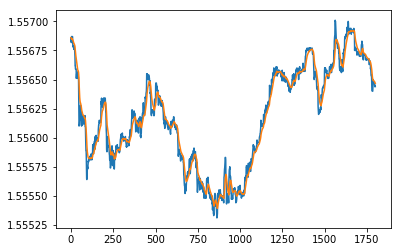

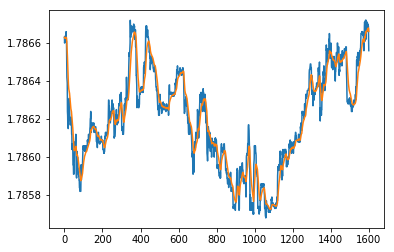

In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

time_stamp = '18_11_20_10_33_28'#'18_11_20_09_11_18'#'18_11_19_11_35_14'
directory = '../RNN/resultsLive/back_test/trader/positions/'+time_stamp+'/'
files_list = []
# get files list, and beginning and end current dates
files_list_all = sorted(os.listdir(directory))    
first_file = 1
i=0
for filename in files_list_all:
    df=pd.read_csv(directory+filename)
    plt.figure(i)
    plt.plot(df.SymbolBid.iloc[:])
    plt.plot(df.EmBid.iloc[:])
    print(df.SymbolBid.shape)
    i+=1

(1800,)
(1600,)
(1700,)
(1100,)
(1500,)
(1300,)
(1485,)
(3200,)
(2500,)
(3100,)
(2308,)
(4800,)
(4511,)
(1100,)


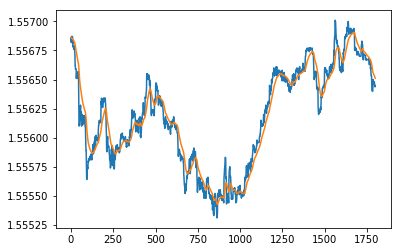

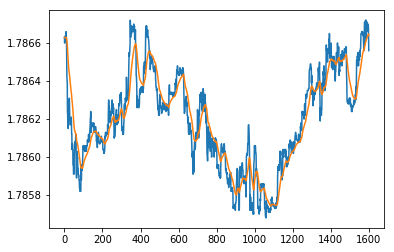

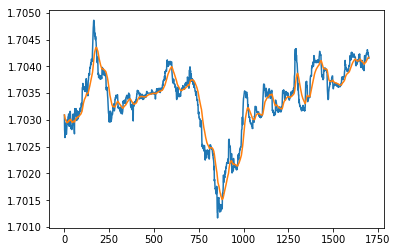

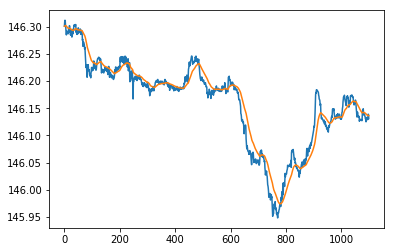

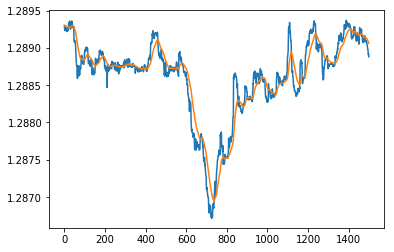

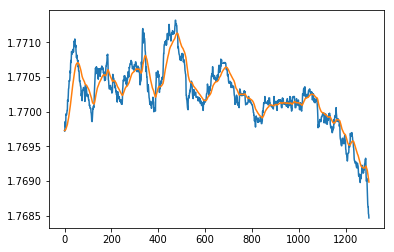

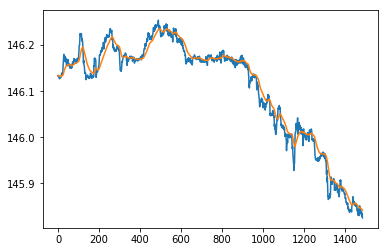

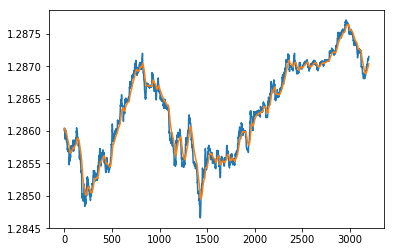

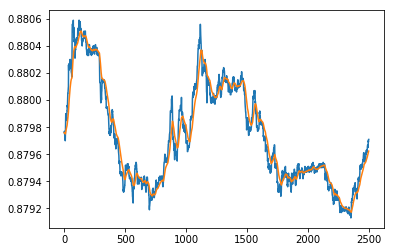

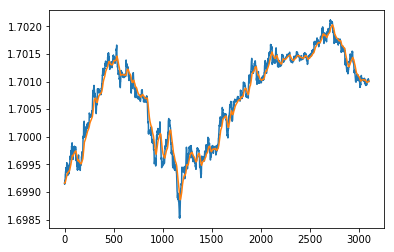

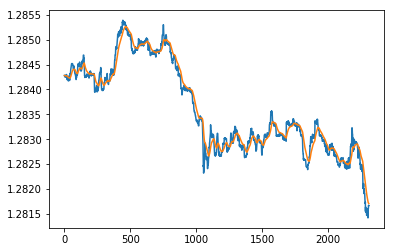

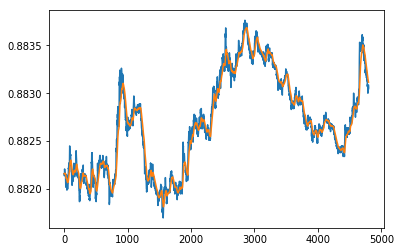

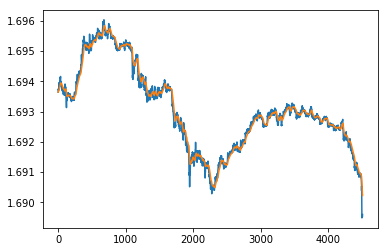

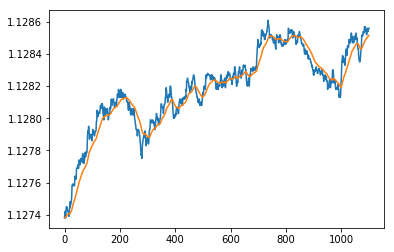

In [12]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

time_stamp = '18_11_20_10_50_29'#'18_11_20_09_11_18'#'18_11_19_11_35_14'
directory = '../RNN/resultsLive/back_test/trader/positions/'+time_stamp+'/'
files_list = []
# get files list, and beginning and end current dates
files_list_all = sorted(os.listdir(directory))    
first_file = 1
i=0
for filename in files_list_all:
    df=pd.read_csv(directory+filename)
    plt.figure(i)
    plt.plot(df.SymbolBid.iloc[:])
    plt.plot(df.EmBid.iloc[:])
    print(df.SymbolBid.shape)
    i+=1